In [1]:
import pandas as pd
import numpy as np
import emoji
import __future__
import re
import datetime as dt

from scripts.scrub import *

### get unique users from kyle's scrapped data

In [2]:
file = "Tues_Mar21-1"
df_posts = pd.read_csv("data/{}.csv".format(file))
df_posts.drop('Unnamed: 0', inplace=True, axis=1)
df_posts = scrub(df_posts)
users = df_posts['user']
users.to_csv("data/users_{}.csv".format(file), index=False, header=True)

IOError: File data/Tues_Mar21-1.csv does not exist

### USERS

In [5]:
users.to_csv

'user'

In [ ]:
df_users1 = pd.read_csv("data/users_followers.csv")
df_users2 = pd.read_csv("data/users_followers2.csv")
df_users3 = pd.read_csv("data/users_followers3.csv")
df_users = pd.concat([df_users1, df_users2, df_users3])
df_users.drop_duplicates(subset=['Followers', 'Following', 'Posts', 'bio', 'full_name', 'user'])

In [ ]:
df_users.to_csv("data/users_followers_1.csv")

In [ ]:
df_users.reindex(index=)

In [ ]:
import json

In [ ]:
test = df_users2['top_N_photos'].ix[1]

In [ ]:
type(test)

In [ ]:
json.loads(test)

### EDA

In [6]:
import pandas as pd
from matplotlib import pyplot as plt

clean = pd.read_csv("data/Alldataclean.csv")

In [4]:
clean.describe()

,image_key,B_max,B_mean,B_median,B_rms,B_stddev,B_sum,B_sum2,B_var,G_max,...,blur,image_height,image_width,luminance,num_faces,percieved_luminance,likes,Followers,Posts,Following
count,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4.446000e+03,4.446000e+03,4446.000000,4446.000000,...,4446.000000,4446.000000,4446.000000,4.446000e+03,4446.000000,4.446000e+03,4446.000000,4446.000000,4446.000000,4446.000000
mean,9212.974359,251.224247,113.889728,110.504948,132.023429,63.008879,4.263295e+07,7.227769e+09,4316.049463,252.221997,...,2668.819676,591.159919,629.233468,4.477084e+07,0.106613,7.555104e+09,88.625281,1528.332209,648.893837,666.108187
std,2335.315479,14.771719,44.712980,60.472149,43.080765,18.601303,2.013184e+07,4.760960e+09,2332.897171,12.494857,...,3531.336202,137.512163,48.422521,1.856363e+07,0.361681,4.302747e+09,224.056964,6712.020367,1559.695930,1095.373632
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,239.000000,320.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000
25%,7234.250000,255.000000,82.267855,64.000000,103.306621,50.725994,2.792102e+07,3.717088e+09,2573.126494,255.000000,...,460.023979,480.000000,640.000000,3.126722e+07,0.000000,4.505574e+09,26.000000,161.000000,87.000000,135.000000
50%,9258.500000,255.000000,112.539222,103.000000,132.669193,63.611938,4.097244e+07,6.324638e+09,4046.478689,255.000000,...,1338.513076,640.000000,640.000000,4.348130e+07,0.000000,6.822069e+09,47.000000,374.000000,230.000000,323.000000
75%,11153.750000,255.000000,144.066106,152.000000,161.912818,75.834059,5.582880e+07,9.810572e+09,5750.804507,255.000000,...,3393.495733,640.000000,640.000000,5.682512e+07,0.000000,9.748831e+09,84.000000,872.500000,579.000000,677.500000
max,14987.000000,255.000000,254.998269,255.000000,254.998403,120.392409,1.246449e+08,3.073740e+10,14494.332250,255.000000,...,42353.550910,801.000000,640.000000,1.268078e+08,5.000000,3.160065e+10,6192.000000,224794.000000,19881.000000,7516.000000


In [5]:
clean['filters'].value_counts()

Filter Normal       3296
Filter Clarendon     253
Filter Juno          100
Filter Lark          100
Filter Lo-fi          86
Filter Mayfair        65
Filter Gingham        60
Filter Ludwig         49
Filter X-Pro II       48
Filter Hefe           35
Filter Aden           30
Filter Hudson         30
Filter Amaro          30
Filter Rise           28
Filter Crema          27
Filter Perpetua       21
Filter Slumber        20
Filter Valencia       20
Filter Sierra         19
Filter Inkwell        19
Filter Nashville      18
Filter Skyline        17
Filter Moon           17
Filter Reyes          16
Filter Ashby           6
Filter Dogpatch        6
Filter Willow          5
Filter Charmes         4
Filter Stinson         3
Filter Ginza           3
Filter Kelvin          3
Filter 1977            2
Filter Helena          2
Filter Sutro           2
Filter Brooklyn        2
Filter Brannan         1
Filter Earlybird       1
Filter Walden          1
Filter Unknown         1
Name: filters, dtype: int

(array([ 178.,  337.,  433.,  463.,  413.,  405.,  313.,  276.,  232.,
         192.,  173.,  118.,  112.,   87.,   80.,   71.,   40.,   35.,
          32.,   33.,   24.,   29.,   28.,   19.,   13.,   20.,   17.,
          14.,   14.,   14.,   12.,   16.,    7.,   11.,    2.,   10.,
           1.,    3.,    3.,    7.,    7.,    3.,    5.,    2.,    9.,
           3.,    4.,    5.,    0.,    4.,    2.,    2.,    4.,    1.,
           5.,    4.,    4.,    3.,    2.,    1.,    4.,    2.,    2.,
           0.,    1.,    1.,    1.,    3.,    0.,    0.,    3.,    2.,
           1.,    1.,    0.,    1.,    1.,    0.,    1.,    4.,    1.,
           1.,    1.,    3.,    1.,    1.,    1.,    0.,    2.,    0.,
           0.,    0.,    1.,    0.,    0.,    0.,    0.,    1.,    1.,    2.]),
 array([   0.  ,    7.96,   15.92,   23.88,   31.84,   39.8 ,   47.76,
          55.72,   63.68,   71.64,   79.6 ,   87.56,   95.52,  103.48,
         111.44,  119.4 ,  127.36,  135.32,  143.28,  151.24,  159.2

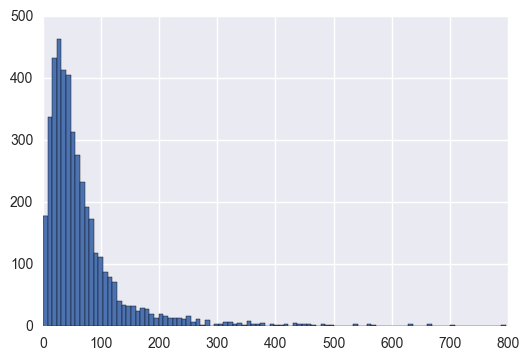

In [10]:
%matplotlib inline
plt.hist(clean['likes'][clean['likes'] < 800], bins = 100)

(array([  83.,  128.,  158.,  155.,  157.,  137.,  142.,  144.,  115.,
         118.,  145.,  109.,  111.,   92.,  102.,   92.,   99.,   95.,
          68.,   77.,   87.,   53.,   62.,   56.,   51.,   60.,   45.,
          52.,   59.,   40.,   39.,   44.,   40.,   34.,   34.,   27.,
          39.,   36.,   31.,   28.,   32.,   21.,   24.,   19.,   24.,
          24.,   44.,   25.,   22.,   24.,   19.,   24.,   16.,   14.,
          14.,   20.,   32.,   16.,   13.,   11.,    7.,    9.,    8.,
           9.,   16.,   12.,   16.,    6.,    3.,    7.,    9.,    6.,
          10.,    8.,    4.,    8.,    9.,    4.,    8.,    3.,    1.,
           4.,    8.,    3.,    4.,    8.,    4.,    8.,    3.,    2.,
           2.,   11.,    1.,    5.,    7.,    4.,    9.,    6.,    7.,    7.]),
 array([    0.  ,    19.96,    39.92,    59.88,    79.84,    99.8 ,
          119.76,   139.72,   159.68,   179.64,   199.6 ,   219.56,
          239.52,   259.48,   279.44,   299.4 ,   319.36,   339.32,
      

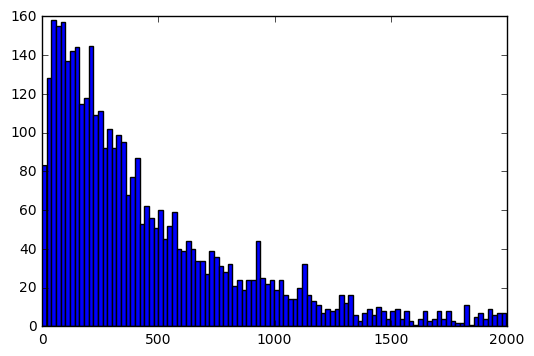

In [7]:
plt.hist(clean['Followers'][clean['Followers'] < 2000], bins = 100)

In [8]:
list(clean)


['image_key',
 'B_max',
 'B_mean',
 'B_median',
 'B_rms',
 'B_stddev',
 'B_sum',
 'B_sum2',
 'B_var',
 'G_max',
 'G_mean',
 'G_median',
 'G_rms',
 'G_stddev',
 'G_sum',
 'G_sum2',
 'G_var',
 'R_max',
 'R_mean',
 'R_median',
 'R_rms',
 'R_stddev',
 'R_sum',
 'R_sum2',
 'R_var',
 'blur',
 'image_height',
 'image_width',
 'luminance',
 'num_faces',
 'percieved_luminance',
 'caption',
 'filters',
 'hashtags',
 'image',
 'likes',
 'time',
 'user',
 'tag',
 'post_time',
 'full_name',
 'Followers',
 'Posts',
 'Following']

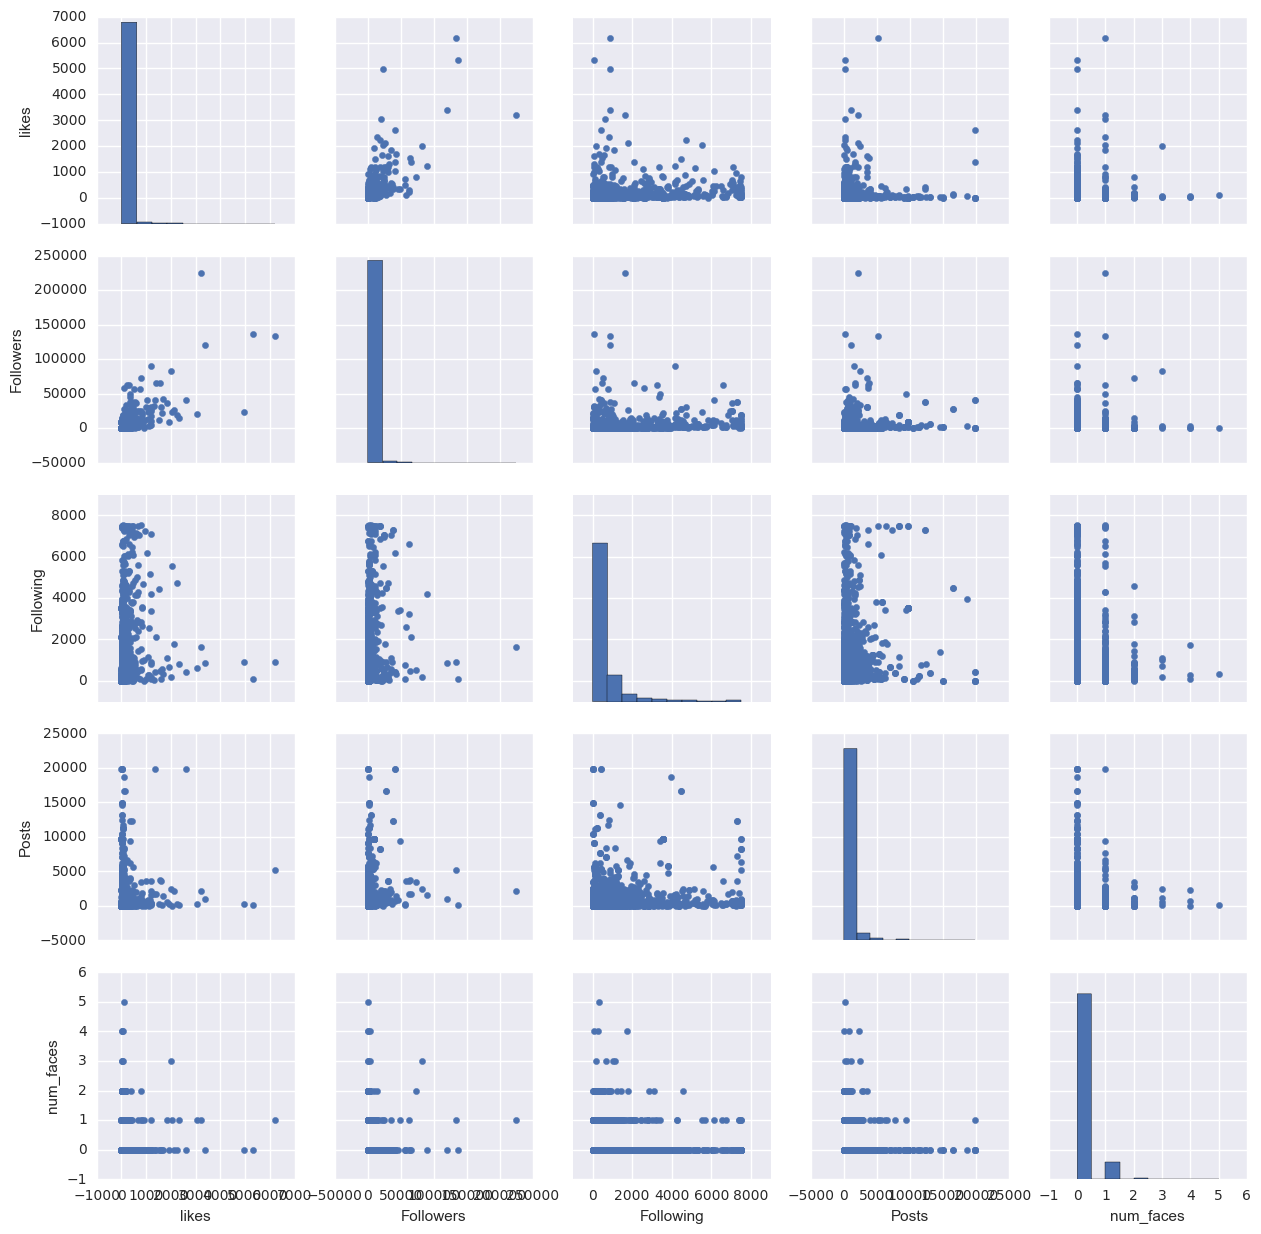

In [9]:
#pick your subset if you want this graph to be remotely useful
col = ['likes','Followers', 'Following', 'Posts', 'num_faces','filters']
clean2 = clean[col]

import seaborn as sns
g = sns.PairGrid(clean2)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

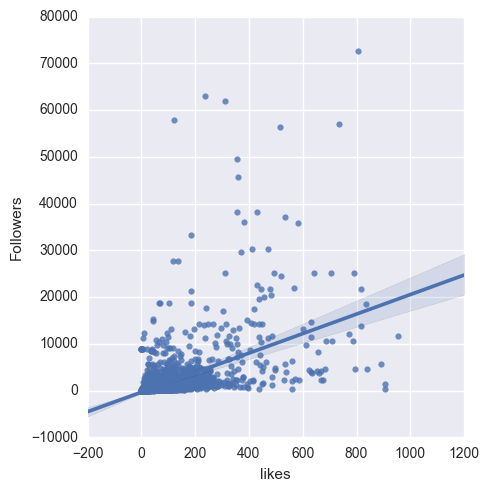

In [14]:
sns.lmplot("likes", "Followers", clean[clean["likes"] < 1000])

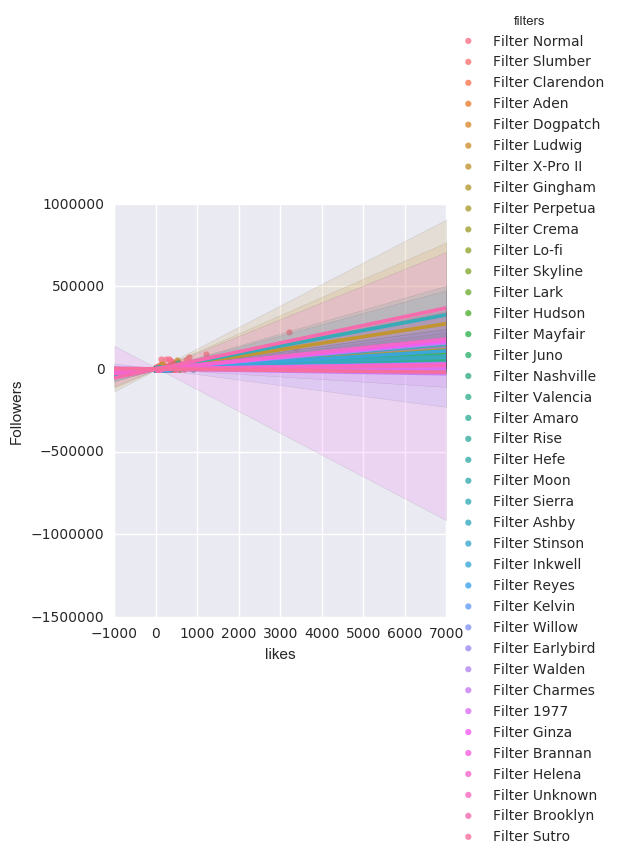

In [11]:
sns.lmplot("likes", "Followers", clean, hue="filters")

/Users/kylegallatin/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


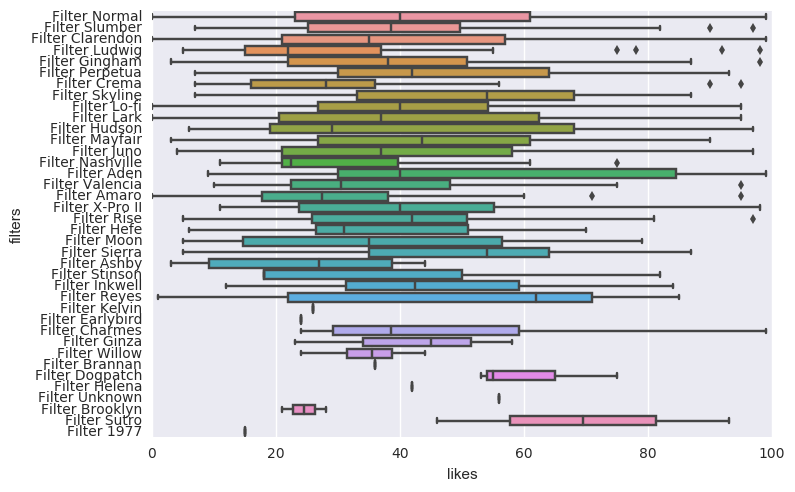

In [12]:
sns.boxplot(x='filters', y='likes', data=clean[clean['likes'] < 100], vert = False)

In [2]:
final_features = pd.read_csv('../../Dropbox/photos/final_df_features.csv')
final_target = pd.read_csv('../../Dropbox/photos/final_df_target.csv')


/Users/kylegallatin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (26,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [52]:
final_features.co


Index([u'Unnamed: 0', u'B_max', u'B_mean', u'B_median', u'B_rms', u'B_stddev',
       u'B_sum', u'B_sum2', u'B_var', u'G_max', u'G_mean', u'G_median',
       u'G_rms', u'G_stddev', u'G_sum', u'G_sum2', u'G_var', u'R_max',
       u'R_mean', u'R_median', u'R_rms', u'R_stddev', u'R_sum', u'R_sum2',
       u'R_var', u'blur', u'caption_hashtags', u'comments', u'filters',
       u'image_height', u'image_width', u'luminance', u'num_faces',
       u'percieved_luminance', u'shoutouts', u'Followers', u'Following',
       u'Posts', u'max_likes', u'mean_likes', u'median_likes', u'min_likes',
       u'num_hashtags', u'hashtag_polarity', u'hashtag_subjectivity'],
      dtype='object')

In [55]:
final_features['luminance']

0        4.002933e+07
1        4.002933e+07
2        4.002933e+07
3        5.712104e+07
4        5.712104e+07
5        5.712104e+07
6        6.231083e+07
7        6.231083e+07
8        6.231083e+07
9        4.266245e+07
10       3.396947e+07
11       3.484327e+07
12       3.563972e+07
13       2.768663e+07
14       4.179710e+07
15       4.584818e+07
16       3.187958e+07
17       7.408806e+07
18       8.146603e+07
19       6.286507e+07
20       8.070963e+07
21       8.094224e+07
22       7.026846e+07
23       8.435264e+07
24       7.559627e+07
25       3.729680e+07
26       7.349265e+07
27       5.333993e+07
28       5.328902e+07
29       4.927051e+07
             ...     
46234    6.095065e+07
46235    1.833235e+07
46236    6.298868e+07
46237    9.475299e+06
46238    4.145162e+07
46239    4.366544e+07
46240    4.083154e+07
46241    5.838930e+07
46242    4.321190e+07
46243    3.125329e+07
46244    5.362686e+07
46245    7.711314e+07
46246    3.880575e+07
46247    1.474663e+07
46248    5

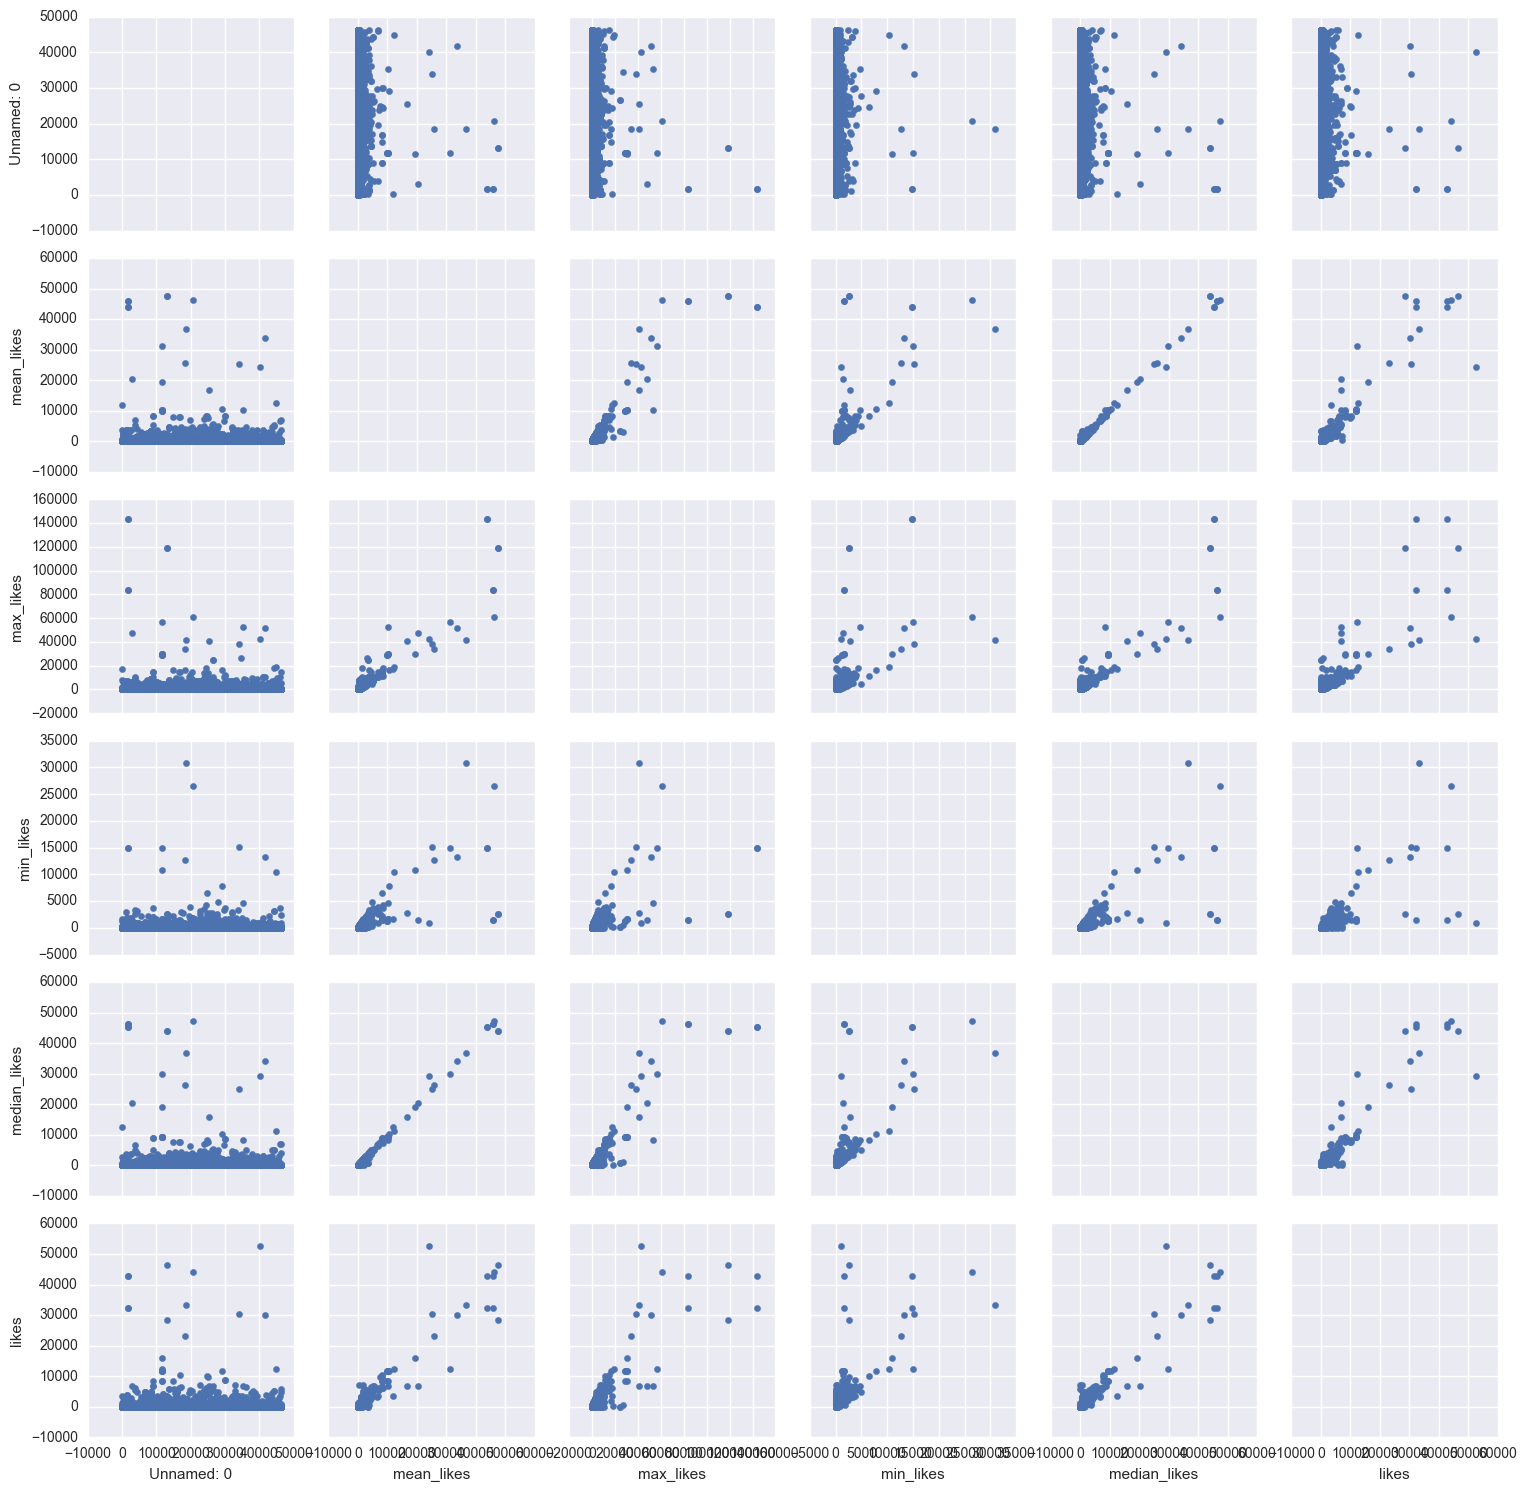

In [11]:
col = ['Unnamed: 0','mean_likes','max_likes','min_likes','median_likes']
clean2 = pd.merge(final_features[col], final_target)

import seaborn as sns
g = sns.PairGrid(clean2)
g.map_offdiag(plt.scatter)

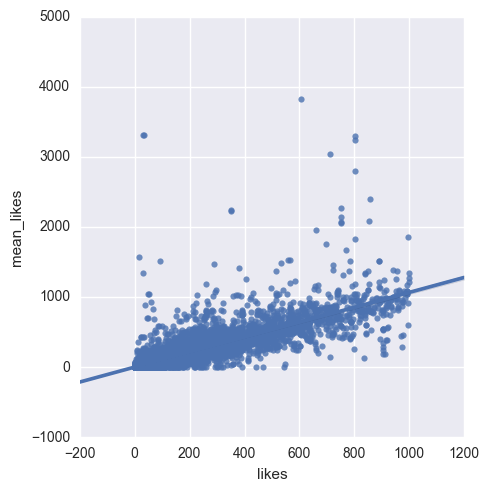

In [16]:
import seaborn as sns
sns.lmplot("likes", "mean_likes", clean2[clean2["likes"] < 1000])